In [1]:
import pandas as pd
from ipynb.fs.full.utils import get_df, rename_values
from ipynb.fs.full.plots import single_barplot

In [2]:
# get formatted and ready to use dataframe
df = get_df()

In [3]:
df.head()

,ID,Status,Duration,D1_Undergraduation,D1_Specialization,D1_Master,D1_Phd,D1_Courses,D1_Others,D2_Country,...,Q15_Model_Deploy_Production_Monitoring,Q16_Model_Monitor_Aspects_Input_And_Output,Q16_Model_Monitor_Aspects_Interpretability_Output,Q16_Model_Monitor_Aspects_Output_And_Decisions,Q16_Model_Monitor_Aspects_Fairness,Q16_Model_Monitor_Aspects_Others,Q16_Model_Monitor_Aspects_Others_Free,Q17_Automated_Machine_Learning_Tools_Yes_No,Q17_Automated_Machine_Learning_Tools_Yes_Free,Origin
2,31,Completed (31),1317,Economics,-99,M.Sc. in Economics,-99,Data Scientist in Datacamp,-99,Brazil,...,-77,not quoted,not quoted,not quoted,not quoted,not quoted,-99,0,-99,https://ww2.unipark.de/uc/seml/
3,34,Completed (31),854,-99,Management,No,No,No,No,Brazil,...,70,not quoted,not quoted,quoted,not quoted,not quoted,-99,No,-99,-99
4,36,Completed (31),1593,Mathematics,Informatics,MSC Computer Science,PhD computer Science,Vários cursos in Coursera,-99,Brazil,...,60,quoted,not quoted,quoted,not quoted,not quoted,-99,"Yes, Please, specify",Own approach,-99
5,57,Completed (31),4238,Computer Science,Data science specialization,-99,-99,-99,-99,Germany,...,100,not quoted,quoted,quoted,not quoted,not quoted,-99,No,-99,-99
6,46,Completed (31),2821,Actuarial Science,Post Graduation in Data Science,M Sc in Data Science -ML models,no Ph D,no other certifications,-99,Brazil,...,80,not quoted,quoted,quoted,not quoted,not quoted,-99,No,-99,-99


In [4]:
df_q11 = df.filter(regex='Q11')
df_q11.head()

,Q11_NFRs_NotConsidered,Q11_NFRs_DataQuality,Q11_NFRs_ModelAccountability,Q11_NFRs_ModelEthicsFairness,Q11_NFRs_ModelExplainability,Q11_NFRs_ModelInteractiveness,Q11_NFRs_ModelReliability,Q11_NFRs_ModelTransparency,Q11_NFRs_SystemCompatibility,Q11_NFRs_SystemMaintanibility,Q11_NFRs_SystemPerformance,Q11_NFRs_SystemPortability,Q11_NFRs_SystemPrivacy,Q11_NFRs_SystemReliability,Q11_NFRs_SystemSafety,Q11_NFRs_SystemSecurity,Q11_NFRs_SystemUsability,Q11_NFRs_Others,Q11_NFRs_Others_Free
2,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,-99
3,not quoted,quoted,not quoted,quoted,not quoted,not quoted,not quoted,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,-99
4,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,not quoted,-99
5,not quoted,quoted,not quoted,not quoted,quoted,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,not quoted,not quoted,quoted,not quoted,not quoted,not quoted,not quoted,-99
6,not quoted,quoted,quoted,quoted,quoted,quoted,quoted,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,-99


In [5]:
#Responses as others

df_q11_others = df_q11.filter(regex='Others')
df_q11_others

for c in df_q11_others.columns:
    print(c)
    print(df_q11_others[c].value_counts())

Q11_NFRs_Others 
not quoted    191
-77            82
quoted          3
Name: Q11_NFRs_Others , dtype: int64
Q11_NFRs_Others_Free                  
-99              192
-66               82
i am not sure      1
Name: Q11_NFRs_Others_Free                  , dtype: int64


In [6]:
# Pandas DataFrame [quoted per columns]

dict_q11 = {}
for c in df_q11.columns:
    if "Free" and "Others" not in c:
        role = c.split('_')
        dict_q11[role[2:][0]] = df_q11[c].value_counts()['quoted']

df_q11_quoted = pd.DataFrame(data={'NFRs': list(dict_q11.keys()), 'Answers': list(dict_q11.values())})
df_q11_quoted = df_q11_quoted.sort_values('Answers', ascending=False)
df_q11_quoted

,NFRs,Answers
1,DataQuality,119
6,ModelReliability,73
10,SystemPerformance,69
4,ModelExplainability,65
16,SystemUsability,50
9,SystemMaintanibility,36
13,SystemReliability,35
15,SystemSecurity,32
7,ModelTransparency,32
8,SystemCompatibility,28


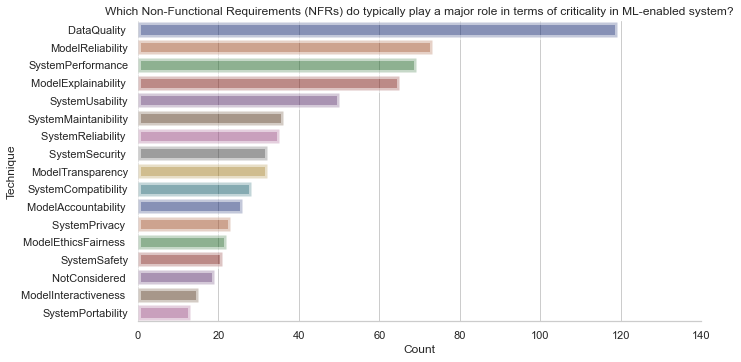

In [7]:
single_barplot(df_q11_quoted, "Answers", "NFRs", 
               title="Which Non-Functional Requirements (NFRs) do typically play a major role in terms of criticality in ML-enabled system?",
               x_label="Count", y_label="Technique", x_label_rotation=0)

In [8]:
for other in list(df['Q11_NFRs_Others_Free                  '].unique()):
    print(other)

-99
nan
i am not sure
-66
